<a href="https://colab.research.google.com/github/kimyujin0/Machine-Learning_2022/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#도미 vs 빙어 이진분류

In [69]:
#도미 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

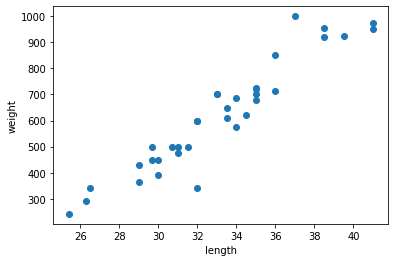

In [16]:
# 산점도
import matplotlib.pyplot as plt
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

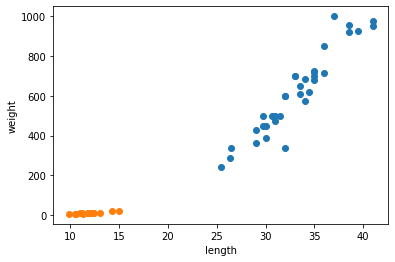

In [19]:
# 산점도 (하나의 그래프에 두 개의 데이터 표시)
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
# 도미와 빙어 합치기
length = bream_lengh+smelt_length
weight = bream_weight+smelt_weight

In [70]:
# 리스트 내포 (리스트 안에 리스트 만들기)
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])
# 사이킷런에 사용할 이차원의 배열

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [71]:
# 정답 준비
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# 지도학습을 위한 결과값 부여

사이킷런으로 훈련 세트와 테스트 세트 나누기

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [75]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [76]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

수상한 도미

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
kn = KNeighborsClassifier()

In [79]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [80]:
kn.score(test_input, test_target)

1.0

In [81]:
print(kn.predict([[25,150]])) # 25cm, 150g인 도미로 예측값 0 즉, 빙어

[0.]


In [87]:
distances, indexes = kn.kneighbors([[25, 150]])

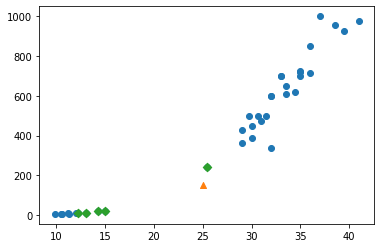

In [89]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')

In [90]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


전처리 데이터로 모델 훈련하기

In [93]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [94]:
train_scaled = (train_input - mean) / std

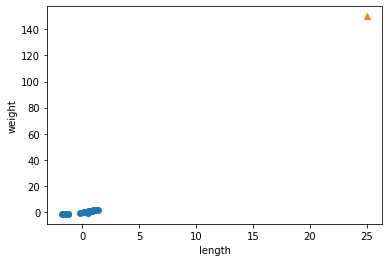

In [95]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [96]:
new = ([25, 150] - mean) / std

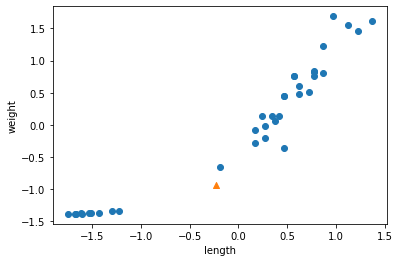

In [97]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [98]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [99]:
test_scaled = (test_input - mean) / std

In [100]:
kn.score(test_scaled, test_target)

1.0

In [101]:
distances, indexes = kn.kneighbors([new])

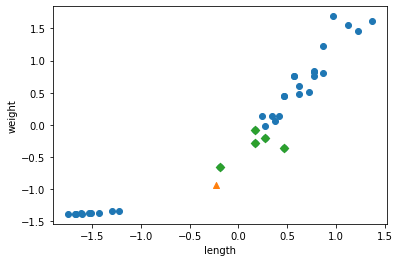

In [102]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()